Nasze kroki

1) Importowanie bibliotek <br>
2) Wczytanie danych <br>
3) Analiza danych<br>
4) Label Encoding i one hot encoding<br>
5) Feature Engineering<br>
6) Usuwanie zbędnych danych<br>
7) Normalizacja danych<br>
8) Podział danych<br>
9) Linear regression<br>
10) Przewidywanie wartości domu<br>

#### 1) Importowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2) Wczytanie danych

In [2]:
train = pd.read_csv("liniowa/train.csv")
test = pd.read_csv("liniowa/test.csv")
train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### 3) Analiza danych

In [3]:
train.columns
train.shape
test.shape

(1459, 80)

In [4]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
for col in train:
    if train[col].dtype == 'object':
        train[col] = train[col].fillna(train[col].mode())
    else:
        train[col] = train[col].fillna(train[col].median())

#### 4) Label Encoding i one hot encoding

In [6]:
from sklearn.preprocessing import LabelEncoder


def label_encoding(df_train,df_test):
    le_count=0;
    for col in df_train:
        if df_train[col].dtype == 'object':
            if len(list(df_train[col].unique())) <= 2:
                le = LabelEncoder()
                le.fit(list(df_train[col].unique())+list(df_test[col].unique()))

                df_train[col] = le.transform(df_train[col].astype(str))
                df_test[col] = le.transform(df_test[col].astype(str))
                le_count +=1;
               
    
    print("Total label encoded columns : %d " %le_count)

In [7]:
label_encoding(train,test)
train.shape
test.shape

Total label encoded columns : 3 


(1459, 80)

In [8]:
import copy

train_objs_num = len(train)
dataset = pd.concat(objs=[train, test], axis=0)
dataset = pd.get_dummies(dataset)
train = copy.copy(dataset[:train_objs_num])
test = copy.copy(dataset[train_objs_num:])
test = test.drop(['SalePrice'],axis=1)
train.shape
test.shape

/home/tumnus/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(1459, 286)

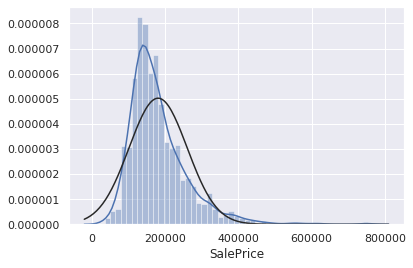

In [26]:
from scipy.stats import norm
sns.distplot(train['SalePrice'],fit=norm)

#### 5) Feature Engineering

In [10]:
corr = train.corr()

In [11]:
corr = corr.sort_values('SalePrice')
cols = corr['SalePrice'][corr['SalePrice'].values > 0.2].index.values

In [12]:
cols

array(['BsmtUnfSF', 'Neighborhood_StoneBr', 'LotShape_IR1',
       'BsmtFullBath', 'PavedDrive_Y', 'BsmtQual_Gd',
       'GarageType_BuiltIn', 'RoofStyle_Hip', 'Electrical_SBrkr',
       'HouseStyle_2Story', 'MSZoning_RL', 'GarageQual_TA', 'CentralAir',
       'FireplaceQu_Ex', 'LotArea', 'GarageCond_TA', 'HalfBath',
       'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'BsmtExposure_Gd',
       'OpenPorchSF', '2ndFlrSF', 'KitchenQual_Gd', 'WoodDeckSF',
       'Neighborhood_NoRidge', 'MasVnrType_Stone', 'LotFrontage',
       'GarageType_Attchd', 'FireplaceQu_Gd', 'SaleCondition_Partial',
       'SaleType_New', 'BsmtFinSF1', 'Neighborhood_NridgHt',
       'GarageFinish_Fin', 'HeatingQC_Ex', 'BsmtFinType1_GLQ',
       'ExterQual_Ex', 'ExterQual_Gd', 'GarageYrBlt', 'Fireplaces',
       'MasVnrArea', 'Foundation_PConc', 'KitchenQual_Ex', 'YearRemodAdd',
       'YearBuilt', 'TotRmsAbvGrd', 'BsmtQual_Ex', 'FullBath', '1stFlrSF',
       'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea',
 

We will draw heatmap plot of top 10 correlated variables!

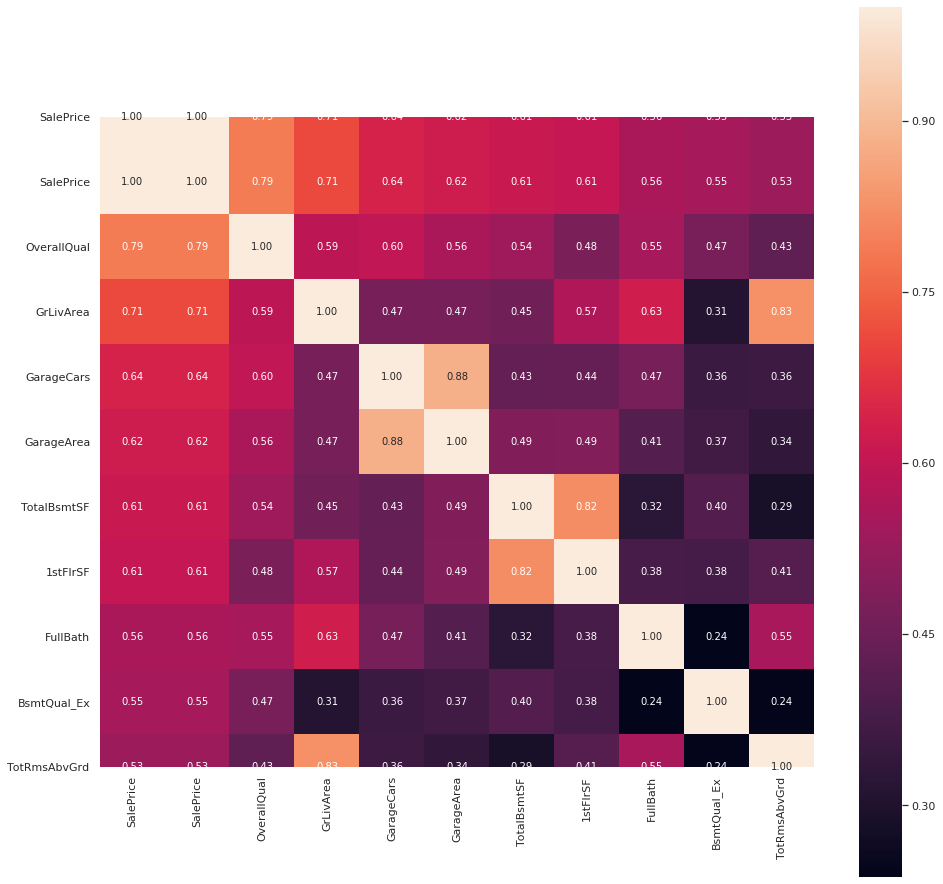

In [13]:
heatMapCols=np.append(cols[-10:], np.array(['SalePrice']))
cm = np.corrcoef(train[heatMapCols[::-1]].T)
plt.figure(figsize=(16,16))
sns.set(font_scale=1)
with sns.axes_style("white"):
    sns.heatmap(cm,yticklabels=heatMapCols[::-1],xticklabels=heatMapCols[::-1],fmt='.2f',annot_kws={'size':10},annot=True,square=True,cmap=None)

In [14]:
train_label = train['SalePrice']

cols = np.delete(cols,len(cols)-1)

train_sample = train[cols]

test_sample = test[cols]


In [15]:
test_sample.head()
train_sample.head()

,BsmtUnfSF,Neighborhood_StoneBr,LotShape_IR1,BsmtFullBath,PavedDrive_Y,BsmtQual_Gd,GarageType_BuiltIn,RoofStyle_Hip,Electrical_SBrkr,HouseStyle_2Story,...,YearBuilt,TotRmsAbvGrd,BsmtQual_Ex,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,150.0,0,0,1.0,1,1,0,0,1,1,...,2003,8,0,2,856,856.0,548.0,2.0,1710,7
1,284.0,0,0,0.0,1,1,0,0,1,0,...,1976,6,0,2,1262,1262.0,460.0,2.0,1262,6
2,434.0,0,1,1.0,1,1,0,0,1,1,...,2001,6,0,2,920,920.0,608.0,2.0,1786,7
3,540.0,0,1,1.0,1,0,0,0,1,1,...,1915,7,0,1,961,756.0,642.0,3.0,1717,7
4,490.0,0,1,1.0,1,1,0,0,1,1,...,2000,9,0,2,1145,1145.0,836.0,3.0,2198,8


#### 6) Tam gdzie wartości są puste wyliczenie średniej

In [16]:
from sklearn.preprocessing import  Imputer
imputer = Imputer(strategy = 'median')

imputer.fit(train_sample)

train_sample = imputer.transform(train_sample)
test_sample = imputer.transform(test_sample)

/home/tumnus/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


#### 7) Normalizacja danych

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_sample)

train_sample = scaler.transform(train_sample)
test_sample = scaler.transform(test_sample)

#### 8) Podział danych

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(train_sample,train_label,train_size = 0.8)


#### 9) Uczenie modelu

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_sample,train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 10) Przewidywanie wartości

In [22]:
y_preds = model.predict(X_test)

#### 11) Błąd modelu

In [23]:
from sklearn import metrics

print("Root Mean square error: " , np.sqrt(metrics.mean_squared_error(y_test,y_preds)))

Root Mean square error:  22708.820932144845
